In [ ]:
# Practical 1:
#Sequence Manipulation
# a) Read and parse sequence data from files
# b) Perform basic sequence manipulations (e.g. reverse complement, translation)
!pip install Biopython

from Bio.Seq import Seq
from Bio import SeqIO

def read_sequences(file_path, file_format='fasta'):
  sequences = []
  for record in SeqIO.parse(file_path,file_format):
    sequences.append(record.seq)
  return sequences

file_path = "ls_orchid.fasta"
sequences = read_sequences(file_path)
for i,seq in enumerate(sequences):
  print(f"Sequence {i+1}: {seq}")
  print(f"Reverse Complement: {seq.reverse_complement()}")
  print(f"Protein Translation: {seq.transcribe().translate()}")

In [ ]:
# Practical 2:
#Sequence Alignment
# a) Perform Pairwise Sequence Alignment using algorithms like Neeldeman-Wunsch or Smith-Waterman
# b) Implement multiple Sequence Alignment using methods such as ClustalW or MUSCLE
!pip install Biopython
!apt install clustalo
# A
from Bio.pairwise2 import align, format_alignment

seq1=""
seq2=""

#Global Alignment using Needleman-Wunsch Algorithm
globalAlignments = align.globalxx(seq1,seq2)
#Local Alignment using Smith-Waterman Algorithm
localAlignments = align.localxx(seq1,seq2)

for alignment in globalAlignments:
  print(format_alignment(*alignment))
for alignment in localAlignments:
  print(format_alignment(*alignment))

#B
import subprocess
import sys
from Bio import Align
from Bio.motifs import Motif

# !./clustalw2 -infile=opuntia.fasta -outfile=./clustal.aln
command = "clustalo -infile=./opuntia.fasta -outfile=./clustal.aln"
return_code = subprocess.call(command,shell=(sys.platform!="win32"))
assert return_code == 0, "Calling ClustalW failed"
alignment = Align.read("clustal.aln","clustal")
print(alignment)
print("first description: %s" % alignment.sequences[0].description)
print("first sequence: %s" % alignment.sequences[0].seq)
print("length %i" % alignment.length)
motif = Motif("ACGT", alignment)
counts = motif.counts
consensus = motif.counts.calculate_consensus(identity=0.7)
print("consensus %s" % consensus)
motif.background = {"A": 0.3, "G": 0.2, "T": 0.3, "C": 0.2}
relative_entropy = motif.relative_entropy
print("relative entropy for columns [5:30]: %f" % sum(relative_entropy[5:30]))

In [ ]:
#Practical 3:
# Perform Database Searching
#a) Perform sequence searches against databases (e.g. BLAST or FASTA)
#b) Retrieve and Analyze Search results
!pip install Biopython

from io import StringIO
from Bio import SeqIO
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML
f_record = next(SeqIO.parse("m_cold.fasta", "fasta"))
print("Doing the BLAST and retrieving the results...")
result_handle = NCBIWWW.qblast("blastn", "nr", f_record.format("fasta"))
with open("m_cold_blast.out", "w") as save_file:
    blast_results = result_handle.read()
    save_file.write(blast_results)
print("Parsing the results and extracting info...")
string_result_handle = StringIO(blast_results)
b_record = NCBIXML.read(string_result_handle)
E_VALUE_THRESH = 0.1
for alignment in b_record.alignments:
    for hsp in alignment.hsps:
        if hsp.expect < E_VALUE_THRESH:
            print("****Alignment****")
            print("sequence: %s" % alignment.title)
            print("length: %i" % alignment.length)
            print("e value: %f" % hsp.expect)
            print(hsp.query[0:75] + "...")
            print(hsp.match[0:75] + "...")
            print(hsp.sbjct[0:75] + "...")

In [ ]:
#Practical 4:
# To perform Protein Structure Analysis
#a) Retrieve protein structure from databases like PDB
#b) Calculate structural properties
!pip install Biopython nglview ipywidgets
!apt install dssp
from Bio import PDB
from Bio.PDB.DSSP import DSSP
import nglview as nv
import ipywidgets
from google.colab import output
output.enable_custom_widget_manager()
repository = PDB.PDBList()
parser = PDB.PDBParser()
repository.retrieve_pdb_file('2etx', pdir='.', file_format='pdb')
k7t = parser.get_structure('2etx','pdb2etx.ent')
dssp = DSSP(k7t[0],'pdb2etx.ent',file_type="PDB")
for res in dssp:
    print("Amino Acid:",res[1])
    print("Secondary Structure:",res[2])
    print("Relative ASA:",res[3])
nv.show_biopython(k7t)

In [ ]:
#Practical 5:
# To perform Genomic Data Analysis
#a) Retrieve genomic data from databases
#b) Analyze Gene Annotations, promoter regions, or regulatory elements

<ipython-input-25-3029eef78034>:15: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,2

                                     Condition         A1BG     A1BG-AS1  \
03611591-08da-45c5-bfe5-ce511a2cc341    normal  0.108403483  1.187325638   
045e2535-012c-4cec-b386-9d6f62b91829    normal  0.095187869  0.594016407   
118933b6-86c7-4668-9973-424ece352a60    normal  0.097042537  1.012277195   
153cb1b1-774c-4e65-b209-6a462b68cfc5    normal   0.04302861  1.015939279   
18f0b34c-d2f6-4746-b450-8ed3def9e334    normal  0.095016254  1.174120262   

                                             A1CF          A2M      A2M-AS1  \
03611591-08da-45c5-bfe5-ce511a2cc341  0.001370356  459.7836081  0.486278098   
045e2535-012c-4cec-b386-9d6f62b91829  0.032045614  648.0057316  1.080389631   
118933b6-86c7-4668-9973-424ece352a60            0  444.8724975  1.047980517   
153cb1b1-774c-4e65-b209-6a462b68cfc5            0  751.7312734  0.780322401   
18f0b34c-d2f6-4746-b450-8ed3def9e334            0  1385.150034  0.721304607   

                                            A2ML1    A2ML1-AS1   A2M

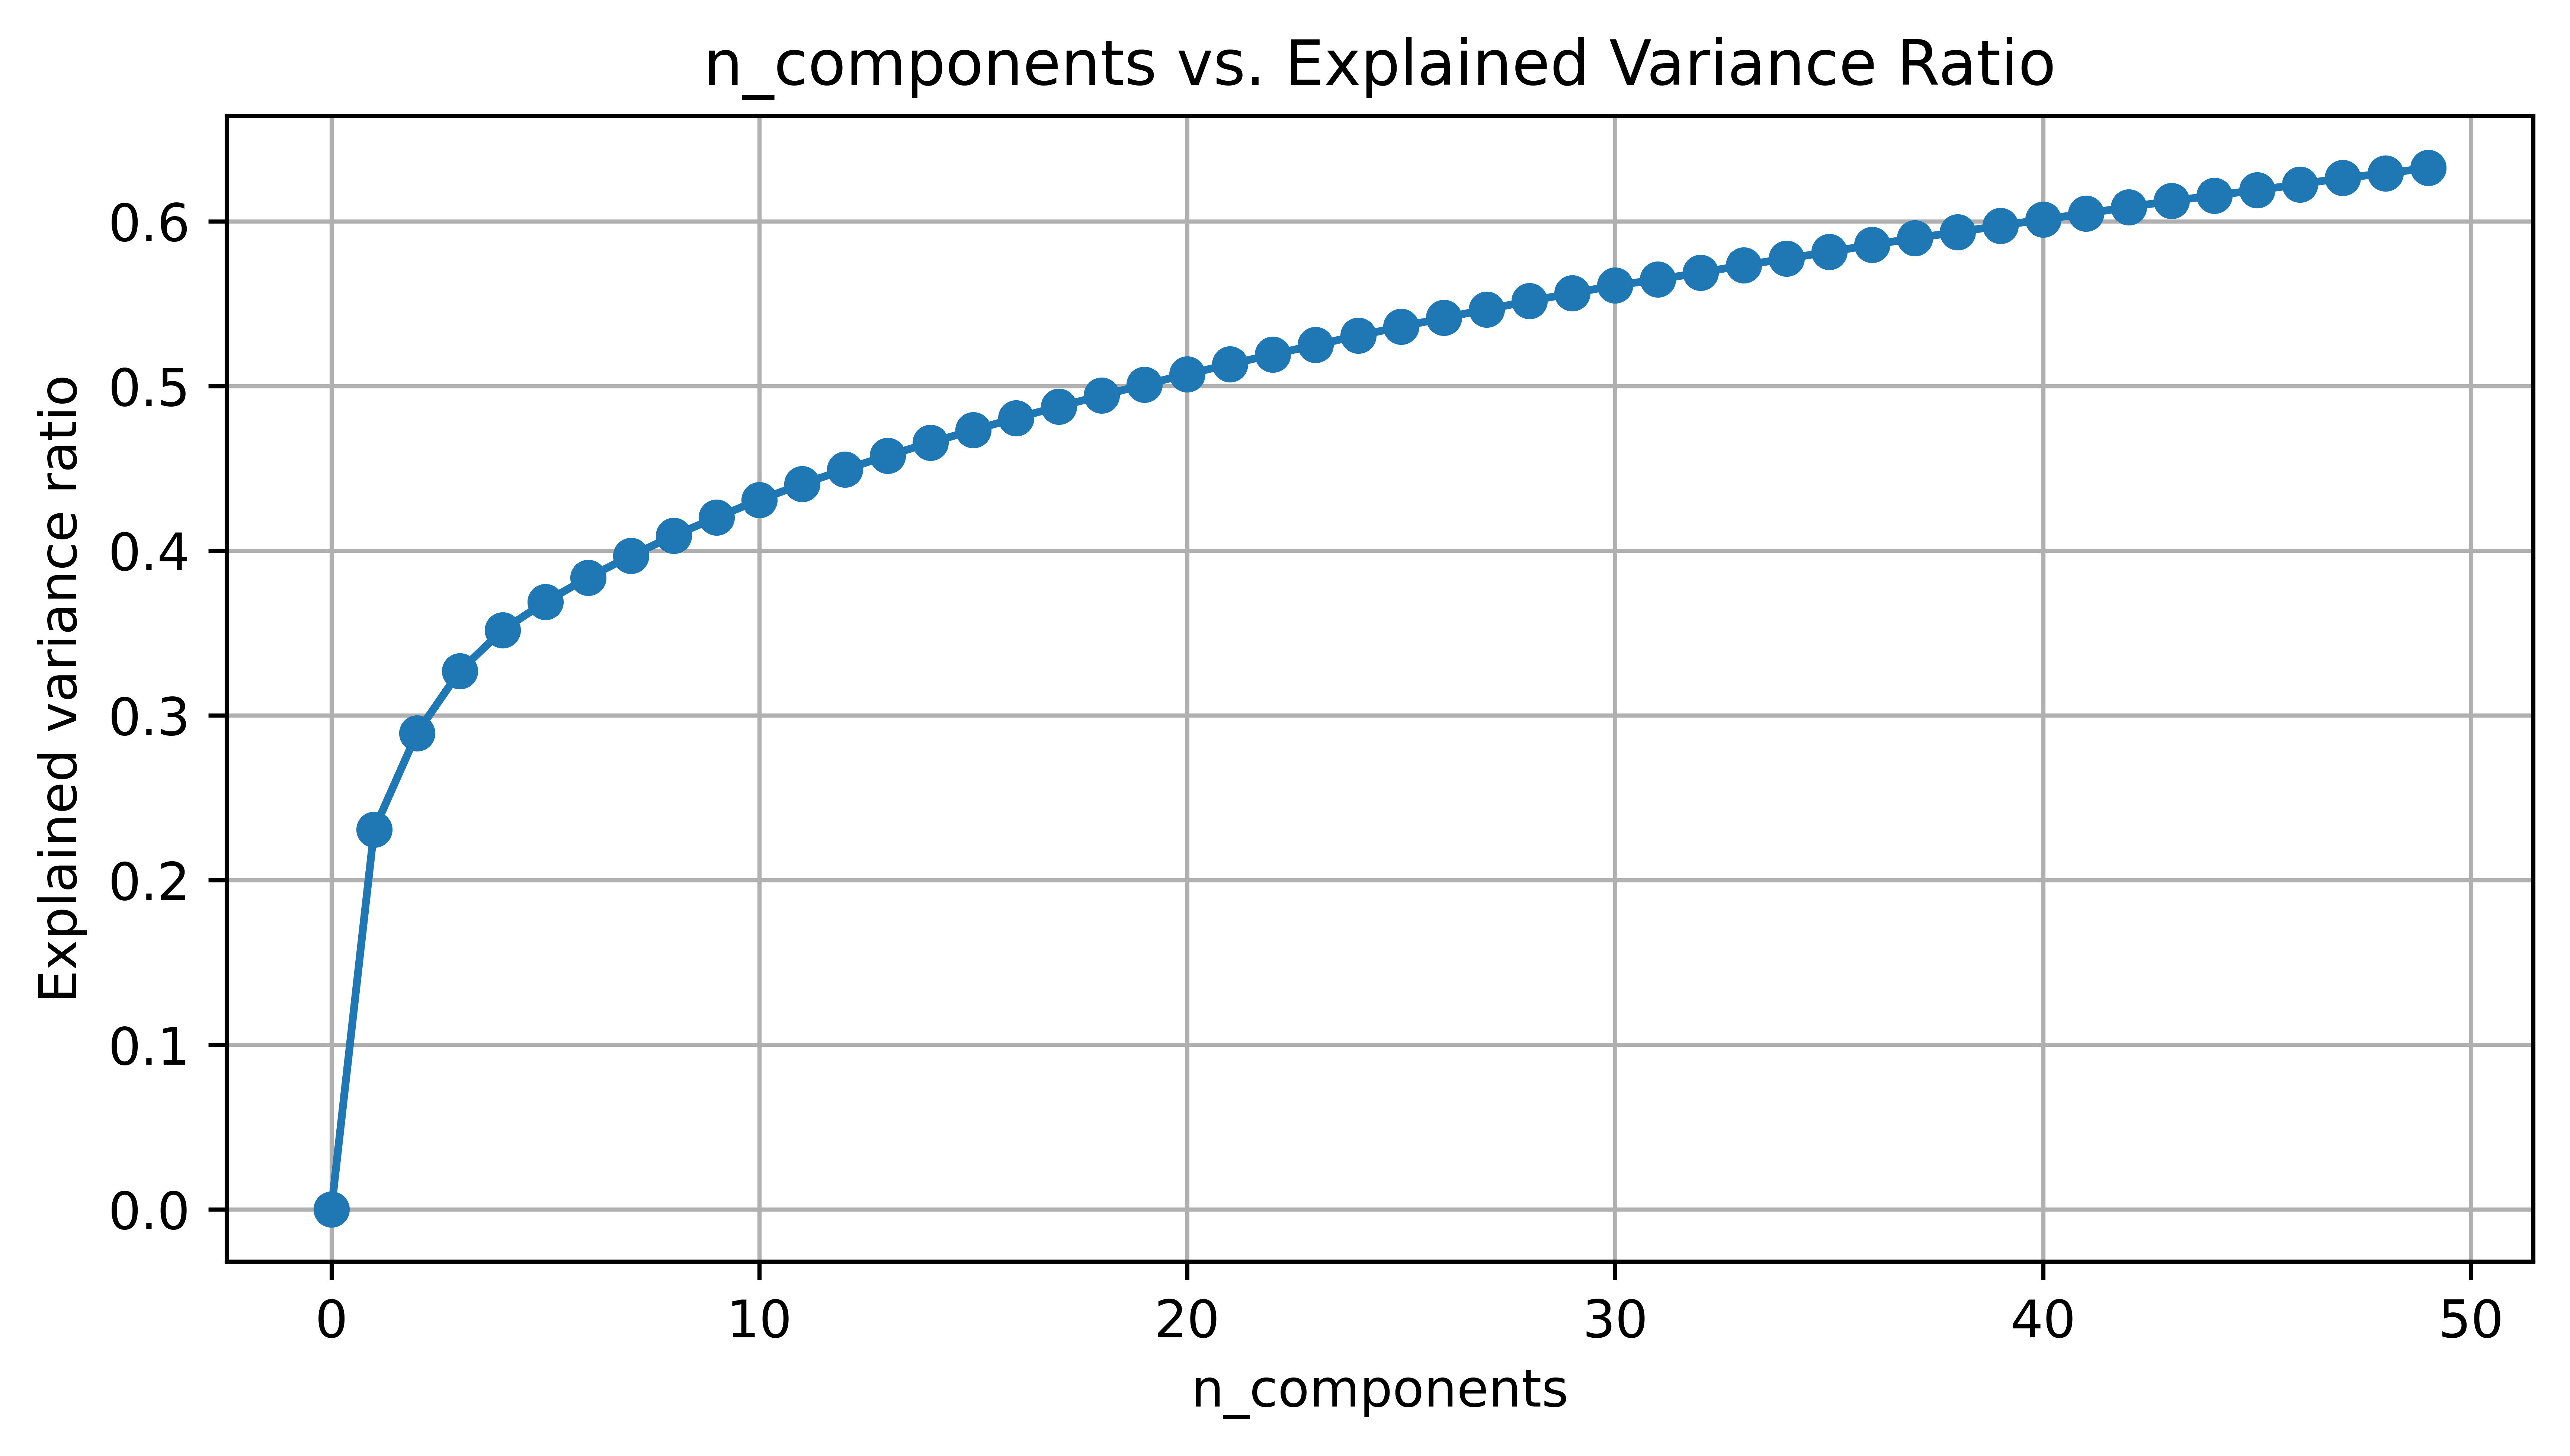

In [25]:
#Practical 6:
# To perform Data Preprocessing
#a) Cleaning and preprocessing of Biological Data (e.g. gene expression data, DNA sequences)
#b) Handling missing values, outliers and normalization of data
#c) Feature selection and dimensionality reduction techniques
!pip install pandas numpy scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("LUSCexpfile.csv",delimiter=";")
df = df.T
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns = {np.nan:'Condition'})
df.columns.name = None
print(df.head())
df.dropna(inplace=True)

df = df.apply(lambda x: x.astype(np.float64) if x.name != 'Condition' else x.astype('str'))
print(df.dtypes)
zero_expr_mask = df.apply(lambda x: x.sum() > 0 if x.dtype != 'object' else True)
print(f'{df.shape[1] - df.loc[:, zero_expr_mask].shape[1]} number of the transcripts are filtered out because of the zero expression.')
df = df.loc[:, zero_expr_mask]
print(df.head())
X = df.drop('Condition', axis=1)
y = df['Condition']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
nums = np.arange(50)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(8,4),dpi=1000)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
pca = PCA(n_components=30)
pca_df = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42, stratify=df['Condition'])
print(f"X train shape : {X_train.shape}")
print(f"X test shape : {X_test.shape}")

In [ ]:
#Practical 7:
# To perform classification
# a) Applying machine learning algorithms (e.g. decision techniques, random
# forests, support vector machine) to classify biological samples or sequences
!pip install pandas numpy scikit-learn matplotlib seaborn
#https://drive.google.com/file/d/1Z9hompGmMqVmKF_IeGNTCNTbhpMfvZVo/view?usp=sharing : Link to dataset
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

df = pd.read_csv("Data/LUSCexpfile.csv",delimiter=";")
df = df.T
df.columns = df.iloc[0]
df = df[1:]
df = df.rename(columns = {np.nan:'Condition'})
df.columns.name = None
print(df.head())
if df.isnull().all().sum() > 0:
    df.dropna(inplace=True)
df = df.apply(lambda x: x.astype(np.float64) if x.name != 'Condition' else x.astype('str'))
print(df.dtypes)
zero_expr_mask = df.apply(lambda x: x.sum() > 0 if x.dtype != 'object' else True)
print(f'{df.shape[1] - df.loc[:, zero_expr_mask].shape[1]} number of the transcripts are filtered out because of the zero expression.')
df = df.loc[:, zero_expr_mask]
print(df.head())
X = df.drop('Condition', axis=1)
y = df['Condition']
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)
nums = np.arange(50)
var_ratio = []
for num in nums:
  pca = PCA(n_components=num)
  pca.fit(X_scaled)
  var_ratio.append(np.sum(pca.explained_variance_ratio_))
plt.figure(figsize=(8,4),dpi=1000)
plt.grid()
plt.plot(nums,var_ratio,marker='o')
plt.xlabel('n_components')
plt.ylabel('Explained variance ratio')
plt.title('n_components vs. Explained Variance Ratio')
pca = PCA(n_components=30)
pca_df = pca.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.3,random_state=42, stratify=df['Condition'])
print(f"X train shape : {X_train.shape}")
print(f"X test shape : {X_test.shape}")
lable2id = {"normal" : 0, "tumor":1}
y_train = y_train.map(lable2id)
y_test = y_test.map(lable2id)
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
class GRID:
    LR_grid: dict = {
        'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky'],
        'C': [1e-03, 1e-2, 1e-1, 1, 10],
        'penalty': ['l1', 'l2']
    }
    SVC_grid: dict = {
        'C': [1e-03, 1e-2, 1e-1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
    }
    RF_grid: dict = {
        'n_estimators': [50, 100, 150, 200, 250],
        'criterion': ['entropy', 'gini'],
    }
log_estimator_lusc = LogisticRegression()

log_model_lusc = GridSearchCV(estimator=log_estimator_lusc,
                  param_grid=GRID.LR_grid,
                  cv=5,
                  scoring='f1')

log_model_lusc.fit(X_train, y_train)

print("Best Parameters:\n", log_model_lusc.best_params_)

# Select best log model
best_log_lusc = log_model_lusc.best_estimator_

# Make predictions using the optimised parameters
log_pred_lusc = best_log_lusc.predict(X_test)

print('Logistic Regression accuracy:', round(accuracy_score(y_test, log_pred_lusc), 3))

cm_log_lusc =  confusion_matrix(y_test, log_pred_lusc)

plt.figure(dpi=400)
ax = plt.subplot()
sns.heatmap(cm_log_lusc, annot=True, ax = ax, fmt='g', cmap='Blues')

labels_lusc = ['normal', 'tumor']

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Logistic Regression Confusion Matrix\n(TCGA_LUSC)')
ax.xaxis.set_ticklabels(labels_lusc)
ax.yaxis.set_ticklabels(labels_lusc, rotation=360)


SVC_estimator_lusc = SVC()

SVC_model_lusc = GridSearchCV(estimator=SVC_estimator_lusc,
                  param_grid=GRID.SVC_grid,
                  cv=5,
                  scoring='f1')

SVC_model_lusc.fit(X_train, y_train)

print("Best Parameters:\n", SVC_model_lusc.best_params_)

# Select best SVC model
best_SVC_lusc = SVC_model_lusc.best_estimator_

# Make predictions using the optimised parameters
SVC_pred_lusc = best_SVC_lusc.predict(X_test)

print('SVC accuracy:', round(accuracy_score(y_test, SVC_pred_lusc), 3))

cm_SVC_lusc =  confusion_matrix(y_test, SVC_pred_lusc)

plt.figure(dpi=400)
ax = plt.subplot()
sns.heatmap(cm_SVC_lusc, annot=True, ax = ax, fmt='g', cmap='Blues')

labels_lusc = ['normal', 'tumor']

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVC Confusion Matrix\n(TCGA_LUSC)')
ax.xaxis.set_ticklabels(labels_lusc)
ax.yaxis.set_ticklabels(labels_lusc, rotation=360)


RF_estimator_lusc = RandomForestClassifier()

RF_model_lusc = GridSearchCV(estimator=RF_estimator_lusc,
                  param_grid=GRID.RF_grid,
                  cv=5,
                  scoring='f1')

RF_model_lusc.fit(X_train, y_train)

print("Best Parameters:\n", RF_model_lusc.best_params_)

# Select best RF model
best_RF_lusc = RF_model_lusc.best_estimator_

# Make predictions using the optimised parameters
RF_pred_lusc = best_RF_lusc.predict(X_test)

print('RF accuracy:', round(accuracy_score(y_test, RF_pred_lusc), 3))

cm_RF_lusc =  confusion_matrix(y_test, RF_pred_lusc)

plt.figure(dpi=400)
ax = plt.subplot()
sns.heatmap(cm_RF_lusc, annot=True, ax = ax, fmt='g', cmap='Blues')

labels_lusc = ['normal', 'tumor']

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Random Forest Confusion Matrix\n(TCGA_LUSC)')
ax.xaxis.set_ticklabels(labels_lusc)
ax.yaxis.set_ticklabels(labels_lusc, rotation=360)

In [ ]:
#Practical 8:
# To perform regression on biological data
# a) Building regression models to predict quantitative biological properties
# (e.g. protein structure, gene expression levels)
# b ) Assess model performances
# using metrics such as mean squared error or R-squared Error
!pip install pandas numpy scikit-learn

import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

df = pd.read_csv("Data/clusters.tsv",sep="\t")
print(df.head())
print(df.shape)
X = df.drop("GSM8021764",axis=1)
y = df["GSM8021764"]
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
model = SVR(kernel="poly",degree=4)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print(f"mean_squared_error : {mean_squared_error(y_test,y_pred)}")
print(f"root_mean_squared_error : {root_mean_squared_error(y_test,y_pred)}")

In [ ]:
#Practical 9:
# To perform clustering
#a) Applying clustering algorithms(e.g. k-means, hierarchical clustering) to group similar biological samples or sequences
#b) Assessing Clustering quality using metrics such as silhouette coefficient
# or rand index
!pip install pandas numpy scikit-learn matplotlib

from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, adjusted_rand_score

data = load_breast_cancer()
X = data.data  # Features (gene expression values)
y = data.target  # Target labels (malignant or benign)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=0)
cluster_labels_kmeans = kmeans.fit_predict(X)
hierarchical = AgglomerativeClustering(n_clusters=4)
cluster_labels_hierarchical = hierarchical.fit_predict(X)
silhouette_kmeans = silhouette_score(X, cluster_labels_kmeans)
print(f"Silhouette Coefficient for K-Means: {silhouette_kmeans}")
silhouette_hierarchical = silhouette_score(X, cluster_labels_hierarchical)
print(f"Silhouette Coefficient for Hierarchical Clustering: {silhouette_hierarchical}")
rand_index_kmeans = adjusted_rand_score(y, cluster_labels_kmeans)
print(f"Adjusted Rand Index for K-Means: {rand_index_kmeans}")
rand_index_hierarchical = adjusted_rand_score(y, cluster_labels_hierarchical)
print(f"Adjusted Rand Index for Hierarchical Clustering: {rand_index_hierarchical}")
# Plotting the clustering results
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_kmeans, cmap='viridis', s=50, alpha=0.8)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='^', c='red', s=100, label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels_hierarchical, cmap='viridis', s=50, alpha=0.8)
plt.title('Hierarchical Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [ ]:
#Practical 10:
# To visualize clusters and analyzing their biological significance
#Data Visualization
#a) Generate plots, graphs and figures to visualse bioinformatics results
#b) Use libraries like matplotlib, seaborn or ggplot in python for visualization
#c) Create interactive visualizations using tools like plotly
!pip install pandas numpy scikit-learn matplotlib seaborn
import seaborn as sns
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
data = load_breast_cancer()
X = data.data
y = data.target
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='target', vars=data.feature_names[:5])
plt.suptitle('Pairplot of Breast Cancer Dataset Features', y=1.02)
plt.show()
plt.figure(figsize=(12, 8))
sns.boxplot(x='target', y='mean radius', data=df)
plt.title('Boxplot of Mean Radius by Target Label')
plt.xlabel('Target (0: malignant, 1: benign)')
plt.ylabel('Mean Radius')
plt.show()
correlation_matrix = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Breast Cancer Dataset Features')
plt.show()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Target (0: malignant, 1: benign)')
plt.show()